# ChainMap

- Python also contains a container called “ChainMap” which encapsulates many dictionaries into one unit

1. keys():

    - This function is used to display all the keys of all the dictionaries in ChainMap.


2. values():

    - This function is used to display values of all the dictionaries in ChainMap.


3. maps:

    - This function is used to display keys with corresponding values of all the dictionaries in ChainMap.

In [3]:
import collections

dict1 = { 'a' : 1, 'b' : 2 } 
dict2 = { 'b' : 3, 'c' : 4 } 

chain = collections.ChainMap(dict2, dict1) 

# printing chainMap using maps 
print ("All the ChainMap contents are : ") 
print (chain.maps) 
  
# printing keys using keys() 
print ("All keys of ChainMap are : ") 
print (list(chain.keys())) 
  
# printing keys using keys() 
print ("All values of ChainMap are : ") 
print (list(chain.values())) 

chain['b']

All the ChainMap contents are : 
[{'b': 3, 'c': 4}, {'a': 1, 'b': 2}]
All keys of ChainMap are : 
['a', 'b', 'c']
All values of ChainMap are : 
[1, 3, 4]


3

In [7]:
c = collections.ChainMap({'a': 1,'b': 2, 'c': 3})

d = c.new_child({'d': 4,'e': 5, 'f': 6})

print(d)
print(d.new_child({'g': 'a', 'h': 'b', 'i': 'c'}))

e = c.new_child({'j': 7,'k': 8,'l': 9})

f = e.new_child()

print(e.new_child())

print(c)

e.parents

ChainMap({'d': 4, 'e': 5, 'f': 6}, {'a': 1, 'b': 2, 'c': 3})
ChainMap({'g': 'a', 'h': 'b', 'i': 'c'}, {'d': 4, 'e': 5, 'f': 6}, {'a': 1, 'b': 2, 'c': 3})
ChainMap({}, {'j': 7, 'k': 8, 'l': 9}, {'a': 1, 'b': 2, 'c': 3})
ChainMap({'a': 1, 'b': 2, 'c': 3})


ChainMap({'a': 1, 'b': 2, 'c': 3})

In [8]:
a = {'a': 1, 'b': 2, 'c': 3}
b = {'c': 4, 'd': 5, 'e': 6}

combined = collections.ChainMap(a, b)

print(list(combined))
combined['c']

['c', 'd', 'e', 'a', 'b']


3

In [9]:
# When we print a key that is there in both the dict
print(combined['c'])  # gets the first key it finds

# printing all the items
print(combined.items())

3
ItemsView(ChainMap({'a': 1, 'b': 2, 'c': 3}, {'c': 4, 'd': 5, 'e': 6}))


In [12]:
# updating values

a['c'] = 1000

print(combined.items())

ItemsView(ChainMap({'a': 1, 'b': 2, 'c': 1000}, {'c': 4, 'd': 5, 'e': 6}))


In [13]:
# The reverse updating

combined['c'] = 10

print(a['c'])

print(b['c'])

print(combined.items())

10
4
ItemsView(ChainMap({'a': 1, 'b': 2, 'c': 10}, {'c': 4, 'd': 5, 'e': 6}))


In [14]:
# Iterating over the Chainmap

for item in combined.items():
    print(item)

('c', 10)
('d', 5)
('e', 6)
('a', 1)
('b', 2)


__Lookups search the underlying mappings successively until a key is found. In contrast, writes, updates, and deletions only operate on the first mapping.__

In [15]:
print('e' in combined) # lookup

combined['e'] = 7  # update

print(combined.items()) 

del combined['e']  # delete

print(combined.items())

True
ItemsView(ChainMap({'a': 1, 'b': 2, 'c': 10, 'e': 7}, {'c': 4, 'd': 5, 'e': 6}))
ItemsView(ChainMap({'a': 1, 'b': 2, 'c': 10}, {'c': 4, 'd': 5, 'e': 6}))


__How to update items at deeper level?__

In [9]:
print(combined.maps)

print(type(combined.maps))

combined.maps[1]['c'] = 100

print(combined.maps)

print(b['c'])

[{'a': 1, 'b': 2, 'c': 10}, {'c': 4, 'd': 5, 'e': 6}]
<class 'list'>
[{'a': 1, 'b': 2, 'c': 10}, {'c': 100, 'd': 5, 'e': 6}]
100


## A simple usecase of ChainMap()

- Letting user specified command-line arguments take precedence over environment variables which in turn take precedence over default values

In [ ]:
import os, argparse

defaults = {'color': 'red', 'user': 'guest'}

parser = argparse.ArgumentParser()

parser.add_argument('-u', '--user') 
parser.add_argument('-c', '--color')

namespace = parser.parse_args(args=['-u Pritesh', '-c Blue'])

# namespace = parser.parse_args(args=[])

os.environ['user'] = 'python'
os.environ['color'] = 'white'

print(f"Namespace = {namespace}")

command_line_args = {k: v for k, v in vars(namespace).items() if v is not None}

print(f"command_line_args = {command_line_args}")

combined = collections.ChainMap(command_line_args, os.environ, defaults)
print(combined['color'])
print(combined['user'])

## Creating custom ChainMap()

- ChainMap() by default does only lookup at deeper level and other operations on first dict only.
- What if we want to change this behaviour?
- It is as simple as overriding few methods after inheriting the class.

In [23]:
class DeepChainMap(collections.ChainMap):
    'Variant of ChainMap that allows direct updates to inner scopes'

    def __setitem__(self, key, value):
        for mapping in self.maps:
            if key in mapping:
                mapping[key] = value
                return
        self.maps[0][key] = value

    def __delitem__(self, key):
        for mapping in self.maps:
            if key in mapping:
                del mapping[key]
                return
        raise KeyError(key)
        

d = DeepChainMap({'zebra': 'black'}, {'elephant': 'blue'}, {'lion': 'yellow'})

d['lion'] = 'orange'  # Update at deeper lever

d['snake'] = 'red'    # Adds a new element

del d['elephant']     # Delete at deeper level

print(d.items())

# You can always change the logic in overriden methods and get desired behaviour

ItemsView(DeepChainMap({'zebra': 'black', 'snake': 'red'}, {}, {'lion': 'orange'}))


# Counter

- Name suggests the use case already and what it does


- A Counter is a dict subclass for counting hashable objects.
- It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values.
- Counts are allowed to be any integer value including zero or negative counts.

- Elements are counted from an iterable or initialized from another mapping (or counter):

In [24]:
c = collections.Counter()  # Normal constructor
c

Counter()

In [25]:
c = collections.Counter('put anything here')  # Pass an iterable
c

Counter({'p': 1,
         'u': 1,
         't': 2,
         ' ': 2,
         'a': 1,
         'n': 2,
         'y': 1,
         'h': 2,
         'i': 1,
         'g': 1,
         'e': 2,
         'r': 1})

In [26]:
c = collections.Counter({'red': 4, 'blue': 2})  # a dict
c

Counter({'red': 4, 'blue': 2})

In [27]:
c = collections.Counter(cats=4, dogs=8)  # keyword args
c

Counter({'cats': 4, 'dogs': 8})

In [28]:
c = collections.Counter(['eggs', 'ham', 'eggs'])
c['pav bhaji']  # count of missing element is zero 0.

0

In [35]:
# Tally occurrences of words in a list
cnt = collections.Counter()

list_of_colors = ['red', 'blue', 'red', 'green', 'blue', 'blue'] 

for word in list_of_colors:
    cnt[word] += 1
cnt


# find the most common color in the list

collections.Counter(list_of_colors).most_common(1)

[('blue', 3)]

## elements()

- Return an iterator over elements repeating each as many times as its count.
- Elements are returned in arbitrary order.
- If an element’s count is less than one, elements() will ignore it.

In [36]:
c = collections.Counter(a=2, b=4, c=0, d=-2)

print(list(c.elements()))

['a', 'a', 'b', 'b', 'b', 'b']


## most_common(n)

In [41]:
collections.Counter('abracadabra').most_common(3)

[('a', 5), ('b', 2), ('r', 2)]

## subtract(iterable-or-mapping)

- Elements are subtracted from an iterable or from another mapping (or counter).

In [43]:
c = collections.Counter(a=4, b=2, c=0, d=-2)
d = collections.Counter(a=1, b=2, c=3, d=4, e=5)
c.subtract(d)
c

Counter({'a': 3, 'b': 0, 'c': -3, 'd': -6, 'e': -5})

__The usual dictionary methods are available for Counter objects except for two which work differently for counters.__



1. __fromkeys(iterable):__

    - This class method is not implemented for Counter objects.
    



2. __update(iterable-or-mapping):__

    - Elements are counted from an iterable or added-in from another mapping (or counter). Like dict.update() but adds counts instead of replacing them. Also, the iterable is expected to be a sequence of elements, not a sequence of (key, value) pairs.

In [45]:
c = collections.Counter(a=3, b=1)
d = collections.Counter(a=1, b=2)

print(f"c + d: {c + d}")                       # add two counters together:  c[x] + d[x]


print(f"c - d: {c - d}")                       # subtract (keeping only positive counts)


print(f"c & d: {c & d}")                       # intersection:  min(c[x], d[x]) 


print(f"c | d: {c | d}")                       # union:  max(c[x], d[x])


c + d: Counter({'a': 4, 'b': 3})
c - d: Counter({'a': 2})
c & d: Counter({'a': 1, 'b': 1})
c | d: Counter({'a': 3, 'b': 2})


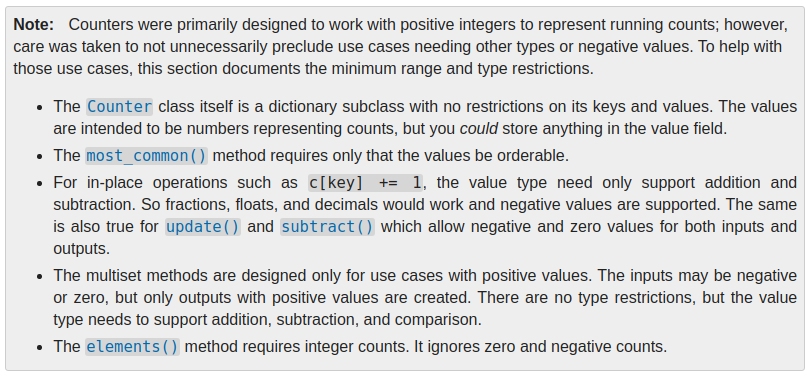

# deque

- The name is pronounced “deck” and is short for “double-ended queue”.
- Deques support thread-safe, memory efficient appends and pops from either side of the deque with approximately the same O(1) performance in either direction.
- Though list objects support similar operations, they are optimized for fast fixed-length operations.



- If maxlen is not specified or is None, deques may grow to an arbitrary length.
- Otherwise, the deque is bounded to the specified maximum length.
- Once a bounded length deque is full, when new items are added, a corresponding number of items are discarded from the opposite end.

__Supported Operations:__

1. __append(x):__
    - Add x to the right side of the deque.
   



2. __appendleft(x):__
    - Add x to the left side of the deque.
   



3. __clear():__
    - Remove all elements from the deque leaving it with length 0.



4. __copy():__
    - Create a shallow copy of the deque.



5. __count(x):__
    - Count the number of deque elements equal to x.



6. __extend(iterable):__
    - Extend the right side of the deque by appending elements from the iterable argument.
    


7. __extendleft(iterable):__
    - Extend the left side of the deque by appending elements from iterable. Note, the series of left appends results in reversing the order of elements in the iterable argument.
    
    

8. __index(x\[, start\[, stop\]\]):__ 
    - Return the position of x in the deque (at or after index start and before index stop). Returns the first match or raises ValueError if not found.
    
    
    
9. __insert(i, x):__
    - Insert x into the deque at position i.
    - If the insertion would cause a bounded deque to grow beyond maxlen, an IndexError is raised.
    
    
    
10. __pop():__
    - Remove and return an element from the right side of the deque. If no elements are present, raises an IndexError.
    
    
    
11. __popleft():__
    - Remove and return an element from the left side of the deque. If no elements are present, raises an IndexError.
    
    
    
12. __remove(value):__
    - Remove the first occurrence of value. If not found, raises a ValueError.
    
    
    
13. __reverse():__
    - Reverse the elements of the deque in-place and then return None.
    
    
    
14. __rotate(n=1):__
    - Rotate the deque n steps to the right. If n is negative, rotate to the left.
    - When the deque is not empty, rotating one step to the right is equivalent to d.appendleft(d.pop()), and rotating one step to the left is equivalent to d.append(d.popleft()).
    


15. __maxlen:__
    - Maximum size of a deque or None if unbounded.

__In addition to the above, deques support iteration, pickling, len(d), reversed(d), copy.copy(d), copy.deepcopy(d), membership testing with the in operator, and subscript references such as d[-1]. Indexed access is O(1) at both ends but slows to O(n) in the middle. For fast random access, use lists instead.__

In [46]:
from collections import deque

d = deque('ghi')                 # make a new deque with three items
print("Iterating over deque: \n")
for elem in d:                   # iterate over the deque's elements
    print(elem.upper(), end=' ')



d.append('j')                    # add a new entry to the right side
print(f"\nd.append('j'): {d}\n")
d.appendleft('f')                # add a new entry to the left side
print(f"\nd.appendleft('j'): {d}\n")                                # show the representation of the deque


d.pop()                          # return and remove the rightmost item
print(f"\nd.pop(): {d}\n")
d.popleft()                      # return and remove the leftmost item
print(f"\nd.popleft(): {list(d)}\n")  # list the contents of the deque
                          

print(f"\nd[0]: {d[0]}\n")                             # peek at leftmost item

print(f"\nd[0]: {d[-1]}\n")                            # peek at rightmost item


print(f"\nlist(reversed(d)): {list(reversed(d))}\n")                # list the contents of a deque in reverse

print(f'\n"h" in d: {"h" in d}\n')                                # search the deque

print(f"\nd.extend('jkl'): {d.extend('jkl')}\n")                  # add multiple elements at once


print(f"\nd.rotate(1): {d.rotate(1)}\n")                      # right rotation
d

print(f"\nd.rotate(-1): {d.rotate(-1)}\n")                     # left rotation
d


print(f"\ndeque(reversed(d)): {deque(reversed(d))}\n")               # make a new deque in reverse order

print(f"\nd.clear(): {d.clear()}\n")                        # empty the deque
print(f"\nd.pop(): {d.pop()}\n")                          # cannot pop from an empty deque

Iterating over deque: 

G H I 
d.append('j'): deque(['g', 'h', 'i', 'j'])


d.appendleft('j'): deque(['f', 'g', 'h', 'i', 'j'])


d.pop(): deque(['f', 'g', 'h', 'i'])


d.popleft(): ['g', 'h', 'i']


d[0]: g


d[0]: i


list(reversed(d)): ['i', 'h', 'g']


"h" in d: True


d.extend('jkl'): None


d.rotate(1): None


d.rotate(-1): None


deque(reversed(d)): deque(['l', 'k', 'j', 'i', 'h', 'g'])


d.clear(): None



IndexError: pop from an empty deque

# defaultdict

In [59]:
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
d = collections.defaultdict(None, s)
d["asdf"]

KeyError: 'asdf'

- The first argument provides the initial value for the **default_factory** attribute; it **defaults to None.** All **remaining arguments** are treated the same as **if they were passed to the dict constructor, including keyword arguments.**

## \_\_missing\_\_(key):

1. If the default_factory attribute is None, this raises a KeyError exception with the key as argument.

- If default_factory is not None, it is called without arguments to provide a default value for the given key, this value is inserted in the dictionary for the key, and returned.

- If calling default_factory raises an exception this exception is propagated unchanged.

- This method is called by the \_\_getitem\_\_() method of the dict class when the requested key is not found; whatever it returns or raises is then returned or raised by \_\_getitem\_\_().

- Note that \_\_missing\_\_() is not called for any operations besides \_\_getitem\_\_(). This means that get() will, like normal dictionaries, return None as a default rather than using default_factory.

## Using list as the default_factory

In [61]:
s = [('yellow', 1), ('blue', 2), ('yellow', 3), ('blue', 4), ('red', 1)]
d = collections.defaultdict(list)
for k, v in s:
    d[k].append(v)

print(d["Asdf"])
sorted(d.items())

[]


[('Asdf', []), ('blue', [2, 4]), ('red', [1]), ('yellow', [1, 3])]

- When each key is encountered for the first time, it is not already in the mapping; so an entry is automatically created using the default_factory function which returns an empty list. The list.append() operation then attaches the value to the new list.

## Setting the default_factory to int

In [62]:
s = 'mississippi'
d = collections.defaultdict(int)
for k in s:
    d[k] += 1

print(d["asdf"])
sorted(d.items())

0


[('asdf', 0), ('i', 4), ('m', 1), ('p', 2), ('s', 4)]

- When a letter is first encountered, it is missing from the mapping, so the default_factory function calls int() to supply a default count of zero. The increment operation then builds up the count for each letter.

In [63]:
print(int())

0


In [70]:
def constant_factory(value):
    return lambda: value

d = collections.defaultdict(constant_factory(5), [('a', 1), ('b', 2)])


print(d['a'])
print(d['b'])
print(d['c'])

1
2
5


# namedtuple()

- They can be used wherever regular tuples are used, and they add the ability to access fields by name instead of position index.

- Any valid Python identifier may be used for a fieldname except for names starting with an underscore. Valid identifiers consist of letters, digits, and underscores but do not start with a digit or underscore and cannot be a keyword such as class, for, return, global, pass, or raise.

- If rename is true, invalid fieldnames are automatically replaced with positional names. For example, ['abc', 'def', 'ghi', 'abc'] is converted to ['abc', '_1', 'ghi', '_3'], eliminating the keyword def and the duplicate fieldname abc.

In [73]:
cls_obj = collections.namedtuple('Student',['name','age','DOB'])  # Student is the user defined type

print(collections.namedtuple('Student',['name','age','DOB']))
print(cls_obj)

S = cls_obj('Nandini','19','2541997')
# s = Student('Nandini','19','2541997')

# Access using index 
print ("The Student age using index is : ",end ="") 
print (S[1]) 
  
# Access using name  
print ("The Student name using keyname is : ",end ="") 
print (S.name) 
  
# Access using getattr() 
print ("The Student DOB using getattr() is : ",end ="") 
print (getattr(S,'DOB')) 

<class '__main__.Student'>
<class '__main__.Student'>
The Student age using index is : 19
The Student name using keyname is : Nandini
The Student DOB using getattr() is : 2541997


## _make(iterable)
- Class method that makes a new instance from an existing sequence or iterable.

In [74]:
Point = collections.namedtuple('Point', ['x', 'y'])
t = [11, 22]
Point._make(t)

Point(x=11, y=22)

## \_asdict()

In [75]:
p = Point(x=11, y=22)
p._asdict()

OrderedDict([('x', 11), ('y', 22)])

## \_replace(**kwargs)

In [77]:
p = Point(x=11, y=22)
p._replace(x=33)  # returns the replaced tuple does not modify existing one

Point(x=33, y=22)

In [78]:
p

Point(x=11, y=22)

# OrderedDict

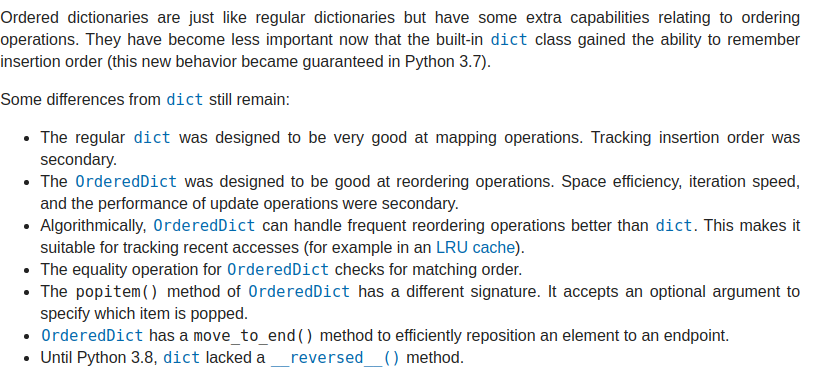

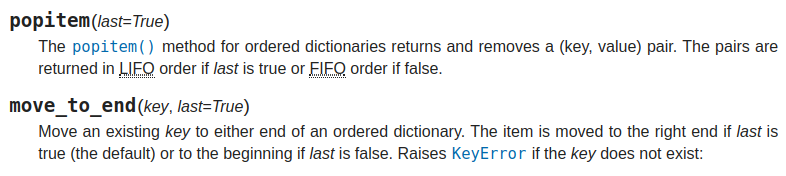

## UserDict, UserList, UserString

- [UserDict](https://docs.python.org/3.7/library/collections.html#userdict-objects)


- [UserList](https://docs.python.org/3.7/library/collections.html#userlist-objects)


- [UserString](https://docs.python.org/3.7/library/collections.html#userstring-objects)